# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [2]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [3]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12
4,South Jack,3/6/19 4:28,34.58,3.908450e+12
5,South Latoya,3/11/19 12:26,9.52,1.995000e+12
6,New Paulville,2/27/19 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/19 0:43,35.98,1.119540e+11
8,South Karenland,1/8/19 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/19 6:26,42.81,5.327640e+12


### Merge the DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [5]:
# total rides by city type
total_rides_city = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_city

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# number of drivers by city type
total_drivers_city = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_city

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
# total fares by city type
total_fares_city = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_city

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
# avg fares by city type
avgfares_perride_city = total_fares_city / total_rides_city
avgfares_perride_city

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [9]:
# avg fares by driver
avgfare_perdriver_city = total_fares_city / total_drivers_city
avgfare_perdriver_city

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [10]:
# Delete the index name
total_rides_city.index.name = None
total_rides_city
total_drivers_city.index.name = None
total_drivers_city
total_fares_city.index.name = None
total_fares_city

Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [11]:
# Adding a list of values with keys to create a new DataFrame.
city_summary_df = pd.DataFrame()

city_summary_df["Total Rides"] = total_rides_city
city_summary_df["Total Drivers"] = total_drivers_city
city_summary_df["Total Fares"] = total_fares_city
city_summary_df["Average Fare per Ride"] = avgfares_perride_city
city_summary_df["Average Fare per Driver"] = avgfare_perdriver_city

city_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
# Format the columns.
city_summary_df["Total Rides"] = city_summary_df["Total Rides"].map("{:.0f}".format)

city_summary_df["Total Drivers"] = city_summary_df["Total Drivers"].map("{:.0f}".format)

city_summary_df["Total Fares"] = city_summary_df["Total Fares"].map("{:.0f}".format)

city_summary_df["Average Fare per Ride"] = city_summary_df["Average Fare per Ride"].map("{:.0f}".format)

city_summary_df["Average Fare per Driver"] = city_summary_df["Average Fare per Driver"].map("{:.0f}".format)

# Display the data frame
city_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4328,35,55
Suburban,625,490,19356,31,40
Urban,1625,2405,39854,25,17


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


In [14]:
# Using groupby() to create a new DataFrame showing the sum of the fares 
# Rename Columns
pyber_data_df = pyber_data_df.rename(columns =
                                     {"city": "City",
                                     "date": "Date", 
                                     "fare": "Fare", 
                                     "ride_id": "Ride_Id",
                                     "driver_count": "Driver_Count",
                                     "type": "City Type"})

# Set index to date column
pyber_data_df.set_index(pyber_data_df["Date"], inplace=True)
# New dataframe where indices are the city type and date.
pyber_city_fares= pyber_data_df[["Date", "City Type", "Fare"]].copy()
pyber_city_fares.head(10)
pyber_city_fares.drop(["Date"], axis=1, inplace=True)
pyber_city_fares.head(10)

,City Type,Fare
Date,,
1/14/19 10:14,Urban,13.83
3/4/19 18:24,Urban,30.24
2/24/19 4:29,Urban,33.44
2/10/19 23:22,Urban,23.44
3/6/19 4:28,Urban,34.58
3/11/19 12:26,Urban,9.52
2/27/19 11:17,Urban,43.25
4/26/19 0:43,Urban,35.98
1/8/19 3:28,Urban,35.09


In [15]:
#group data
sum_fares = pyber_city_fares.groupby(["City Type", "Date"]).sum()[["Fare"]]
sum_fares

Fare
City Type Date                
Rural     1/1/19 9:45    43.69
          1/11/19 4:39   16.42
          1/14/19 15:58  54.10
          1/14/19 7:09   18.05
          1/15/19 21:44  30.26
...                        ...
Urban     5/8/19 1:54    32.69
          5/8/19 2:31    41.33
          5/8/19 4:20    21.99
          5/8/19 4:39    18.45
          5/8/19 7:29    18.55

[2364 rows x 1 columns]

In [16]:
sum_fares_df = pd.DataFrame(sum_fares)
sum_fares_df

Fare
City Type Date                
Rural     1/1/19 9:45    43.69
          1/11/19 4:39   16.42
          1/14/19 15:58  54.10
          1/14/19 7:09   18.05
          1/15/19 21:44  30.26
...                        ...
Urban     5/8/19 1:54    32.69
          5/8/19 2:31    41.33
          5/8/19 4:20    21.99
          5/8/19 4:39    18.45
          5/8/19 7:29    18.55

[2364 rows x 1 columns]

In [17]:
#Reset the index 
sum_fares_df = sum_fares_df.reset_index()
sum_fares_df.head(10)

,City Type,Date,Fare
0,Rural,1/1/19 9:45,43.69
1,Rural,1/11/19 4:39,16.42
2,Rural,1/14/19 15:58,54.10
3,Rural,1/14/19 7:09,18.05
4,Rural,1/15/19 21:44,30.26
5,Rural,1/18/19 0:46,15.12
6,Rural,1/18/19 7:36,43.57
7,Rural,1/19/19 11:40,49.44
8,Rural,1/19/19 12:38,38.68
9,Rural,1/19/19 20:21,56.78


In [18]:
# create a pivot table with the 'date' as the index, the columns ='type', and values='fare' to get the total fares for each type of city by the date. 
sum_fares_pivot = sum_fares_df.pivot(index="Date", columns="City Type")["Fare"]
sum_fares_pivot.head(10)

City Type,Rural,Suburban,Urban
Date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
1/1/19 14:52,NaN,31.15,NaN
1/1/19 17:22,NaN,NaN,42.11
1/1/19 21:04,NaN,NaN,11.71
1/1/19 2:07,NaN,24.07,NaN


In [19]:
# Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

fares_Jan_April_df = sum_fares_pivot.loc['1/1/19':'4/29/19']
fares_Jan_April_df

City Type,Rural,Suburban,Urban
Date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
...,...,...,...
4/28/19 4:34,NaN,NaN,40.46
4/28/19 8:15,NaN,NaN,22.86
4/28/19 9:03,NaN,NaN,15.00


In [35]:
# Set the "date" index to datetime datatype. This is necessary to use the resample() method
fares_Jan_April_df.index = pd.to_datetime(fares_Jan_April_df.index)
fares_Jan_April_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-04-28 04:34:00,NaN,NaN,40.46
2019-04-28 08:15:00,NaN,NaN,22.86
2019-04-28 09:03:00,NaN,NaN,15.00


In [36]:
# Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = fares_Jan_April_df.resample("W").sum()
weekly_fares_df

#Check that the datatype for the index is datetime using df.info()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


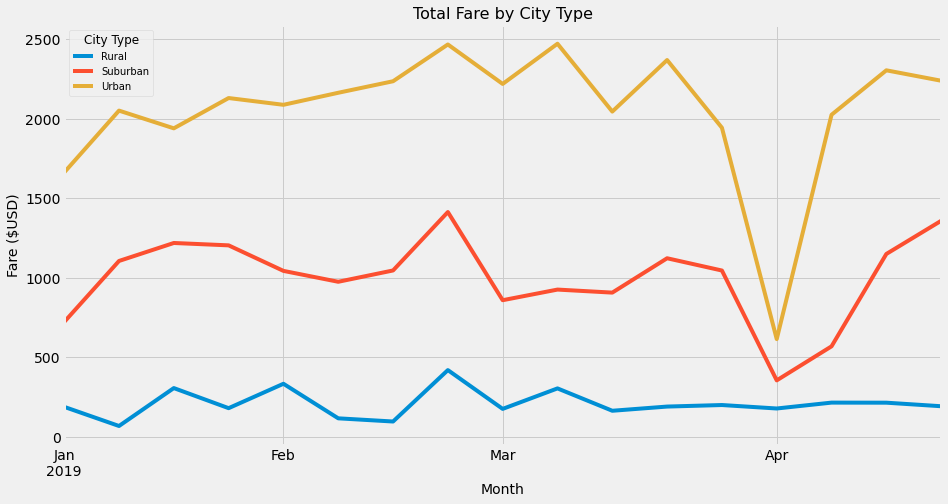

In [37]:
#Import the style from Matplotlib.
from matplotlib import style

#Use the graph style fivethirtyeight
plt.style.use('fivethirtyeight')

#Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
weekly_fares_df.plot(figsize=(14, 8))
plt.gcf().subplots_adjust(bottom=0.15)

# Add graph properties
plt.title("Total Fare by City Type", fontsize=16)
plt.ylabel("Fare ($USD)", fontsize=14)
plt.xlabel("Month", fontsize=14)

# Create a legend
lgnd = plt.legend(fontsize="10", loc="best", title="City Type")
lgnd.get_title().set_fontsize(12)

# Save figure
plt.savefig("analysis/Fig8.png")

# Show figure
plt.show()